<a href="https://colab.research.google.com/github/Aisyahazwn/Data-Science-Project/blob/main/DataScienceProject_Group6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("Patient Survival Prediction.csv")

In [ ]:
df.head()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,66154,25312,118,68.0,22.73,0,Caucasian,M,180.3,Floor,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0
1,114252,59342,81,77.0,27.42,0,Caucasian,F,160.0,Floor,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0
2,119783,50777,118,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0
3,79267,46918,118,81.0,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,0


In [ ]:
df.shape

(9999, 83)

**DATA CLEANING**

In [ ]:
df.isna().any()

encounter_id                   False
patient_id                     False
hospital_id                    False
age                             True
bmi                             True
                               ...  
lymphoma                        True
solid_tumor_with_metastasis     True
apache_3j_bodysystem            True
apache_2_bodysystem             True
hospital_death                 False
Length: 83, dtype: bool

In [ ]:
df.isna().sum()

encounter_id                      0
patient_id                        0
hospital_id                       0
age                             477
bmi                            1744
                               ... 
lymphoma                         75
solid_tumor_with_metastasis      75
apache_3j_bodysystem            254
apache_2_bodysystem             254
hospital_death                    0
Length: 83, dtype: int64

In [ ]:
len(df)

9999

In [ ]:
# DATA CLEANING
# REMOVE COLUMN ID

# copy dataframe in new dataframe
dframe = pd.DataFrame(df)

# Remove two columns name is 'C' and 'D'
dframe.drop(['encounter_id', 'patient_id', 'hospital_id', 'icu_id', 'icu_type', 'icu_admit_source', 'icu_stay_type', 'icu_type' ], axis=1,)

,age,bmi,elective_surgery,ethnicity,gender,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,68.0,22.730000,0,Caucasian,M,180.3,0.541667,73.90,113.0,502.01,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0
1,77.0,27.420000,0,Caucasian,F,160.0,0.927778,70.20,108.0,203.01,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0
2,25.0,31.950000,0,Caucasian,F,172.7,0.000694,95.30,122.0,703.03,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0
3,81.0,22.640000,1,Caucasian,F,165.1,0.000694,61.70,203.0,1206.03,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0
4,19.0,NaN,0,Caucasian,M,188.0,0.073611,NaN,119.0,601.01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,76.0,24.804688,0,Caucasian,F,160.0,0.146528,63.50,302.0,109.02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0
9995,57.0,67.814990,0,Caucasian,M,137.2,0.000000,123.90,122.0,703.03,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0
9996,76.0,33.461535,0,Caucasian,M,172.7,0.000000,99.80,119.0,601.01,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,0
9997,52.0,23.673925,0,Caucasian,M,177.8,0.023611,74.84,302.0,111.01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0


In [ ]:
# drop rows of nan value
dframe.dropna(inplace = True) # drop rows with nan values
dframe.head()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,66154,25312,118,68.0,22.730000,0,Caucasian,M,180.3,Floor,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0
1,114252,59342,81,77.0,27.420000,0,Caucasian,F,160.0,Floor,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0
5,33181,74489,83,67.0,27.560000,0,Caucasian,M,190.5,Accident & Emergency,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic,0
10,105427,125898,77,72.0,28.257052,1,Hispanic,F,154.9,Operating Room / Recovery,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Respiratory,Respiratory,0
17,22471,112115,118,46.0,25.845717,0,Hispanic,M,167.6,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0


In [ ]:
dframe.isna().sum()

encounter_id                   0
patient_id                     0
hospital_id                    0
age                            0
bmi                            0
                              ..
lymphoma                       0
solid_tumor_with_metastasis    0
apache_3j_bodysystem           0
apache_2_bodysystem            0
hospital_death                 0
Length: 83, dtype: int64

In [ ]:
dframe.duplicated().sum()

0

In [ ]:
dframe.describe()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,weight,...,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,hospital_death
count,5064.000000,5064.000000,5064.000000,5064.000000,5064.000000,5064.000000,5064.000000,5064.000000,5064.000000,5064.000000,...,5064.000000,5064.000000,5064.000000,5064.000000,5064.000000,5064.000000,5064.000000,5064.000000,5064.000000,5064.000000
mean,66322.545419,66440.264218,103.158175,61.920616,29.988925,0.140600,169.859070,107.521327,0.570473,86.527006,...,0.055055,0.000395,0.021327,0.236769,0.017180,0.056082,0.007899,0.006714,0.027646,0.063191
std,37749.361595,37317.539552,31.325300,16.913509,8.662556,0.347643,10.709232,17.332749,2.100855,26.197802,...,0.163904,0.019871,0.144486,0.425142,0.129955,0.230103,0.088533,0.081672,0.163973,0.243330
min,12.000000,10.000000,4.000000,16.000000,14.844926,0.000000,137.200000,82.000000,-0.224306,38.600000,...,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33945.500000,34532.500000,83.000000,52.000000,24.020211,0.000000,162.600000,95.000000,0.002778,68.000000,...,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,66609.000000,67225.500000,118.000000,64.000000,28.320585,0.000000,170.200000,100.000000,0.010417,81.640000,...,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,99132.250000,98696.250000,118.000000,75.000000,34.009197,0.000000,177.800000,114.000000,0.092361,99.800000,...,0.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,131045.000000,131040.000000,198.000000,89.000000,67.814990,1.000000,195.590000,160.000000,49.523611,186.000000,...,0.950000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


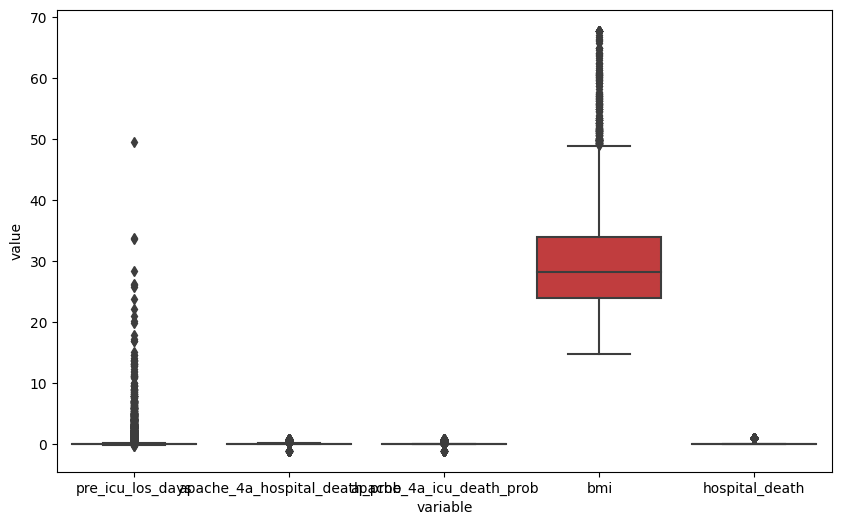

In [ ]:
# IDENTIFY OUTLIERS
#col = ['pre_icu_los_days', 'apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob', 'hospital_death']

import numpy as np; np.random.seed(42)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.DataFrame(data = dframe, columns = ['pre_icu_los_days', 'apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob', 'bmi',
                                              'hospital_death'])
#data.dropna(inplace = True)
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed

sns.boxplot(x="variable", y="value", data=pd.melt(data))

plt.show()

In [ ]:
data.isna().any

<bound method NDFrame._add_numeric_operations.<locals>.any of       pre_icu_los_days  apache_4a_hospital_death_prob  \
0                False                          False   
1                False                          False   
5                False                          False   
10               False                          False   
17               False                          False   
...                ...                            ...   
9992             False                          False   
9993             False                          False   
9996             False                          False   
9997             False                          False   
9998             False                          False   

      apache_4a_icu_death_prob    bmi  hospital_death  
0                        False  False           False  
1                        False  False           False  
5                        False  False           False  
10                       Fals

**DATA EXPLORATION**

In [ ]:
data.describe() # summary statistic

,pre_icu_los_days,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,bmi,hospital_death
count,5064.000000,5064.000000,5064.000000,5064.000000,5064.000000
mean,0.570473,0.089220,0.055055,29.988925,0.063191
std,2.100855,0.202582,0.163904,8.662556,0.243330
min,-0.224306,-1.000000,-1.000000,14.844926,0.000000
25%,0.002778,0.020000,0.010000,24.020211,0.000000
50%,0.010417,0.050000,0.020000,28.320585,0.000000
75%,0.092361,0.120000,0.060000,34.009197,0.000000
max,49.523611,0.970000,0.950000,67.814990,1.000000


array([[<Axes: title={'center': 'pre_icu_los_days'}>,
        <Axes: title={'center': 'apache_4a_hospital_death_prob'}>],
       [<Axes: title={'center': 'apache_4a_icu_death_prob'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'hospital_death'}>, <Axes: >]],
      dtype=object)

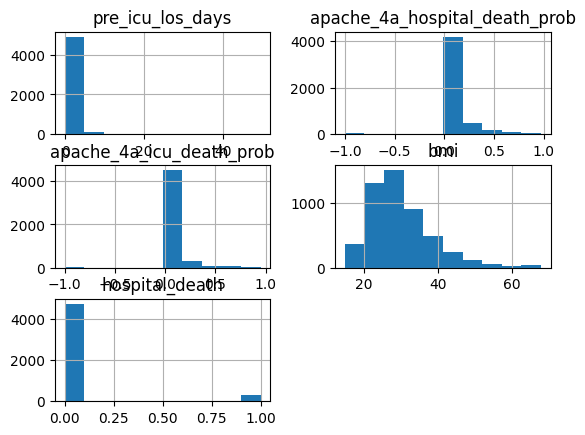

In [ ]:
import seaborn as sb
data.hist()

In [ ]:
# Display summary statistics
summary_statistics = df.describe(include='all')

# Display summary statistics for categorical variables
categorical_summary = df.describe(include='object')

# Print the results
print("Summary Statistics:")
print(summary_statistics)

print("\nSummary Statistics for Categorical Variables:")
print(categorical_summary)

Summary Statistics:
         encounter_id     patient_id  hospital_id          age          bmi  \
count     9999.000000    9999.000000  9999.000000  9522.000000  8255.000000   
unique            NaN            NaN          NaN          NaN          NaN   
top               NaN            NaN          NaN          NaN          NaN   
freq              NaN            NaN          NaN          NaN          NaN   
mean     66358.298530   65641.056106   103.082108    62.426591    29.798087   
std      37797.805281   37408.691229    30.953390    16.588298     8.384418   
min         12.000000       6.000000     4.000000    16.000000    14.844926   
25%      34047.500000   33462.500000    83.000000    53.000000    23.982918   
50%      66810.000000   65605.000000   118.000000    64.000000    28.219692   
75%      99241.500000   97808.500000   118.000000    75.000000    33.765151   
max     131045.000000  131040.000000   198.000000    89.000000    67.814990   

        elective_surgery  ethni

**RELATIONSHIP/CORR**

In [ ]:
import seaborn
df.corr()

<ipython-input-18-0184b4dda58e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,weight,...,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,hospital_death
encounter_id,1.000000,-0.012255,-0.017486,-0.003332,0.006853,-0.000017,-0.000077,-0.023759,0.011051,0.006142,...,0.006410,-0.001677,0.020911,-0.010642,0.006902,0.000434,0.005736,-0.019243,-0.000179,-0.021409
patient_id,-0.012255,1.000000,-0.016567,-0.005964,-0.004041,-0.020581,-0.000788,-0.005215,-0.002718,0.000388,...,-0.002516,0.001974,0.000358,0.005143,-0.002539,0.008155,0.022780,-0.000274,-0.009697,0.020446
hospital_id,-0.017486,-0.016567,1.000000,-0.010851,0.001003,0.028648,0.001085,0.269817,0.043426,0.005313,...,-0.018207,-0.008799,0.008825,0.000049,-0.000026,0.003761,0.012255,0.009686,0.014865,0.014014
age,-0.003332,-0.005964,-0.010851,1.000000,-0.070668,0.077978,-0.135882,-0.014041,0.062393,-0.120380,...,0.049554,-0.023391,-0.029883,0.115350,-0.027719,0.030510,0.028799,0.023014,0.032012,0.086318
bmi,0.006853,-0.004041,0.001003,-0.070668,1.000000,0.012243,-0.038935,-0.002161,-0.004395,0.887110,...,-0.002816,-0.012102,-0.021101,0.239667,-0.007047,-0.024883,-0.017858,0.000150,-0.038865,-0.034452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
immunosuppression,0.000434,0.008155,0.003761,0.030510,-0.024883,-0.029231,-0.019206,-0.019204,0.065359,-0.035198,...,0.025532,0.067363,-0.004241,-0.001554,0.002989,1.000000,0.156972,0.116744,0.263969,0.058943
leukemia,0.005736,0.022780,0.012255,0.028799,-0.017858,-0.020661,0.010527,0.008413,0.078526,-0.014502,...,0.031151,-0.001764,-0.011838,0.006911,-0.010355,0.156972,1.000000,0.039211,0.014455,0.038756
lymphoma,-0.019243,-0.000274,0.009686,0.023014,0.000150,-0.009962,0.008710,0.012034,0.046277,0.004808,...,0.017307,0.064905,0.019982,0.002811,0.025449,0.116744,0.039211,1.000000,0.020839,0.007555
solid_tumor_with_metastasis,-0.000179,-0.009697,0.014865,0.032012,-0.038865,0.025112,-0.000492,-0.021562,0.031724,-0.040810,...,0.035547,-0.003300,-0.007874,-0.019514,0.013125,0.263969,0.014455,0.020839,1.000000,0.068258


In [ ]:
# distributing the dataset into two components X and Y
X = data.drop(columns = ['hospital_death'])
y = data['hospital_death']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

#performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
# Fitting Logistic Regression To the training set
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 5)
classifier.fit(X_train, y_train)


LogisticRegression(random_state=5)

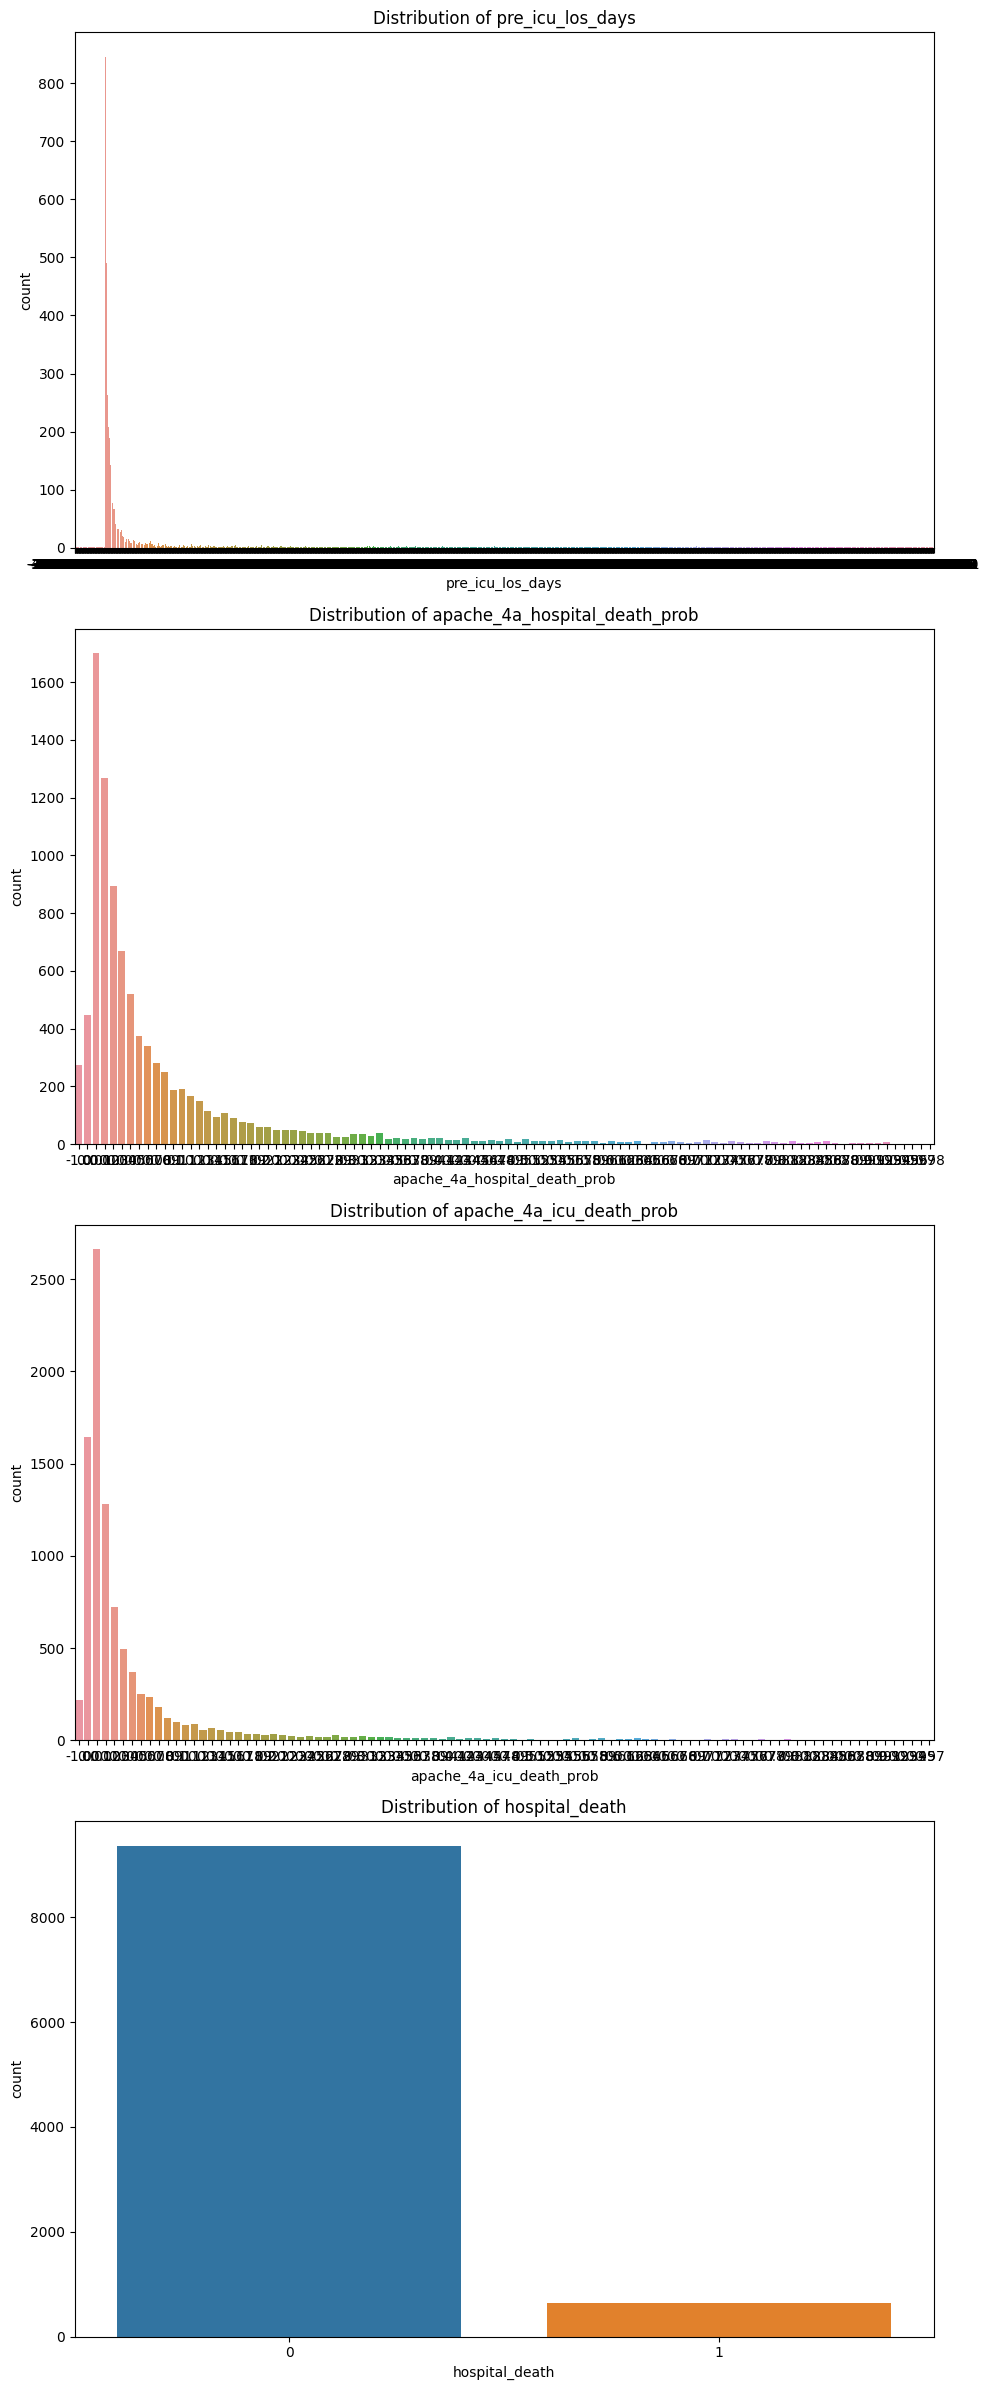

In [ ]:
selected_columns = ['pre_icu_los_days', 'apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob', 'hospital_death']

# Set up subplots for features
fig, axes = plt.subplots(nrows=len(selected_columns), ncols=1, figsize=(10, 6 * len(selected_columns)))

# Plot count distribution for each feature
for i, feature in enumerate(selected_columns):
    sns.countplot(x=feature, data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()


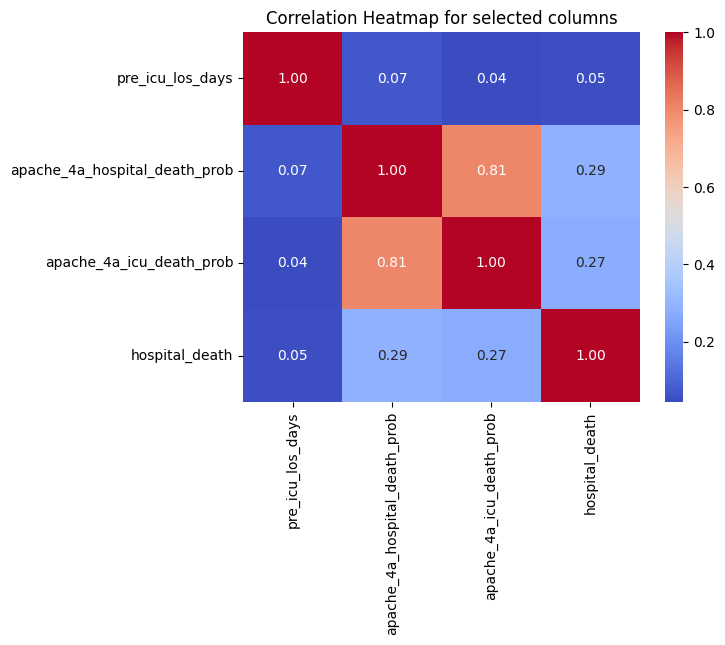

In [ ]:
selected_columns = ['pre_icu_los_days', 'apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob', 'hospital_death']

correlation_matrix = df[selected_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for selected columns')
plt.show()

In [ ]:
# Predicting the test set result using
# predict function under LogisticRegression
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Absolute Error: 0.06219151036525173
Mean Squared Error: 0.06219151036525173
R-squared: -0.11610703043021986


In [ ]:
#Further Analysis On PCA with various bounds

def model_testing(l_bound, u_bound, step):
    Logistic = []
    KNN = []
    RandomForest = []

    for nCom in range(l_bound, u_bound, step):
        print("Working on ", nCom, " Components...")
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)

        pca = PCA(n_components = nCom)
        X_train = pca.fit_transform(X_train)
        X_test = pca.transform(X_test)

        model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

        Logistic.append(model_scores['Logistic Regression'])
        KNN.append(model_scores['KNN'])
        RandomForest.append(model_scores['Random Forest'])

    return (Logistic, KNN, RandomForest)

In [ ]:
# How many total features do we have
len(list(df.columns))

83

In [ ]:
df = df.dropna()
df.isnull().sum()

encounter_id                   0
patient_id                     0
hospital_id                    0
age                            0
bmi                            0
                              ..
lymphoma                       0
solid_tumor_with_metastasis    0
apache_3j_bodysystem           0
apache_2_bodysystem            0
hospital_death                 0
Length: 83, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming 'df' is your DataFrame
# Replace 'feature1', 'feature2', and 'target_variable' with your actual column names
X = df[['pre_icu_los_days', 'apache_4a_hospital_death_prob']]
y = df['hospital_death']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Absolute Error: 0.12058985510259569
Mean Squared Error: 0.06100179597411044
R-squared: 0.14166801079176017


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-30-12752a2ccef3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = kmeans.fit_predict(X)


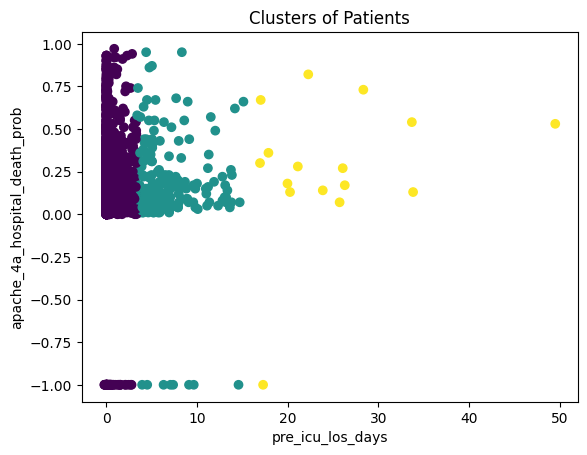

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

k = 3

# Initialize and fit k-means clustering model
kmeans = KMeans(n_clusters=k, random_state=42)
X['cluster'] = kmeans.fit_predict(X)

# Visualize the clusters (assuming two features for simplicity)
plt.scatter(X['pre_icu_los_days'], X['apache_4a_hospital_death_prob'], c=X['cluster'], cmap='viridis')
plt.title('Clusters of Patients')
plt.xlabel('pre_icu_los_days')
plt.ylabel('apache_4a_hospital_death_prob')
plt.show()


In [ ]:
X = df[['pre_icu_los_days', 'apache_4a_hospital_death_prob']]
y = df['hospital_death']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train = X_train[['pre_icu_los_days', 'apache_4a_hospital_death_prob']]
X_test = X_test[['pre_icu_los_days', 'apache_4a_hospital_death_prob']]

# Initialize and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 0.12058985510259569
Mean Squared Error: 0.06100179597411044
R-squared: 0.14166801079176017


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Assuming 'X_train', 'X_test', 'y_train', 'y_test' are already defined
# Replace 'pre_icu_los_days' and 'apache_4a_hospital_death_prob' with your actual column names
X_train = X_train[['pre_icu_los_days', 'apache_4a_hospital_death_prob']]
X_test = X_test[['pre_icu_los_days', 'apache_4a_hospital_death_prob']]

# Define a range of alpha values for tuning
alpha_values = [0.001, 0.01, 0.1, 1, 10, 100]

# Create a Ridge regression model
ridge_model = Ridge()

# Set up a parameter grid for grid search
param_grid = {'alpha': alpha_values}

# Initialize GridSearchCV for parameter tuning
grid_search = GridSearchCV(estimator=ridge_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameter values
best_alpha = grid_search.best_params_['alpha']

# Train a Ridge model with the best alpha value
best_ridge_model = Ridge(alpha=best_alpha)
best_ridge_model.fit(X_train, y_train)

# Make predictions on the test set
ridge_predictions = best_ridge_model.predict(X_test)

# Evaluate the performance of the tuned Ridge model
ridge_mae = mean_absolute_error(y_test, ridge_predictions)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)

print(f'Tuned Ridge Model:')
print(f'Best Alpha: {best_alpha}')
print(f'Mean Absolute Error: {ridge_mae}')
print(f'Mean Squared Error: {ridge_mse}')
print(f'R-squared: {ridge_r2}')


Tuned Ridge Model:
Best Alpha: 1
Mean Absolute Error: 0.12061305243646395
Mean Squared Error: 0.06102547370169468
R-squared: 0.14133485091191123


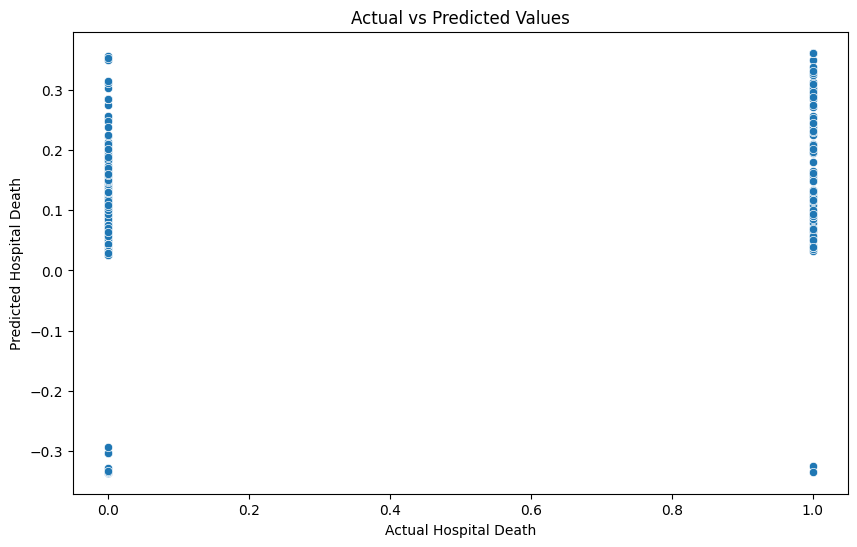

In [ ]:
# Assuming 'X_test', 'y_test', and 'predictions' are already defined
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=predictions)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Hospital Death')
plt.ylabel('Predicted Hospital Death')
plt.show()


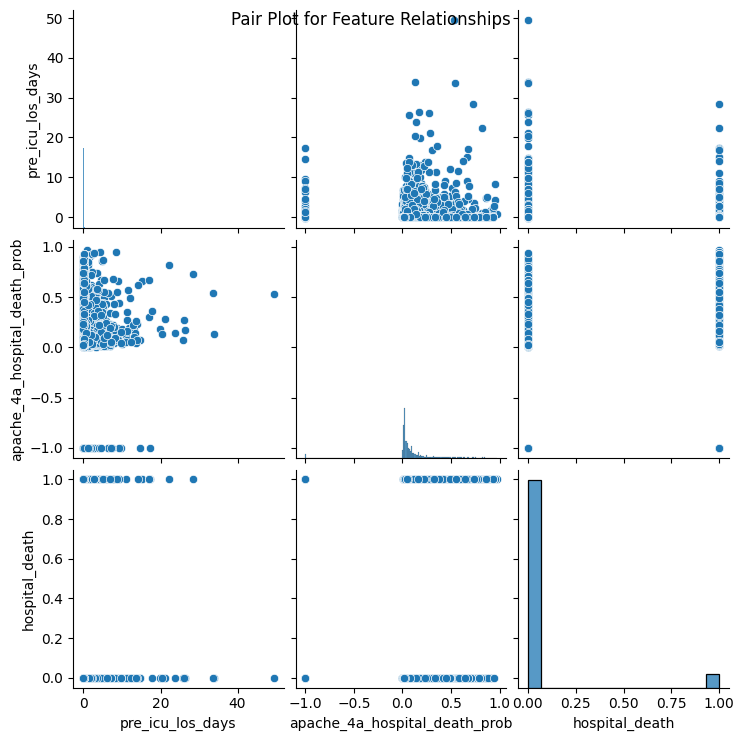

In [ ]:
# Assuming 'df' is your DataFrame with relevant columns
sns.pairplot(df[['pre_icu_los_days', 'apache_4a_hospital_death_prob', 'hospital_death']])
plt.suptitle('Pair Plot for Feature Relationships')
plt.show()
